# MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

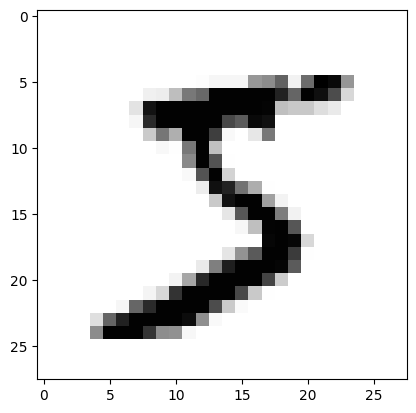

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [6]:
input_shape = X_train.shape[1:]

model = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# optimizer: tf.keras.optimizers.Adam()
# loss: tf.keras.losses.categorical_crossentropy()
# categorical_crossentropy is the loss to use with multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "MnistNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
y_onehot_train = tf.one_hot(y_train, 10)
model.fit(X_train, y_onehot_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 248us/step - accuracy: 0.8407 - loss: 9.7558 


In [8]:
input_shape = X_train.shape[1:]

model = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# sparse_categorical_crossentropy better to use this sparse one-hot encoded version of categorical crossentropy when possible
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "MnistNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        21,980 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,270 (86.99 KB)

 Trainable params: 22,270 (86.99 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=False)
# model.fit(X_train, y_train)
# model.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=[X_test, y_test])

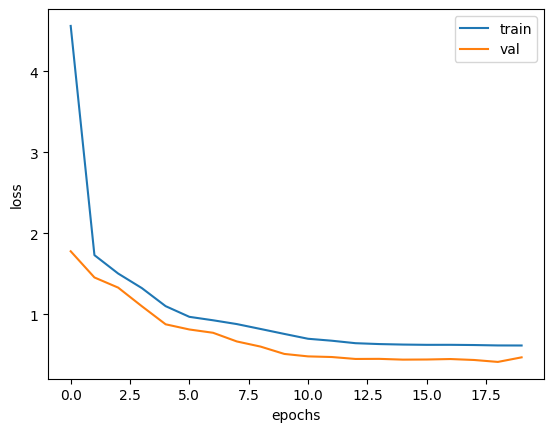

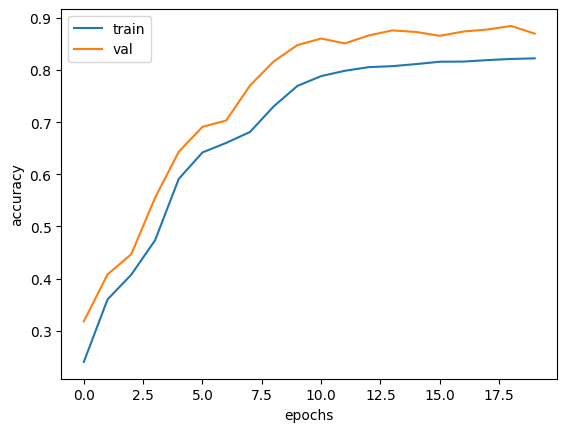

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [11]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.8715 - loss: 0.4755


[0.47548148036003113, 0.8715000152587891]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
[4.2686774e-05 3.0984808e-04 1.6493363e-04 5.5838912e-04 1.9496602e-04
 5.1622410e-06 3.6887650e-07 9.9833173e-01 5.4945062e-06 3.8634837e-04] => 7


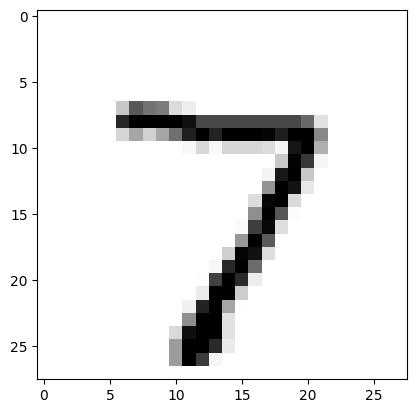

[3.8209034e-03 2.6197708e-04 8.9004964e-01 9.9553810e-03 7.7657499e-03
 3.8150772e-03 8.4242448e-02 5.9625880e-05 2.2916773e-05 6.1286337e-06] => 2


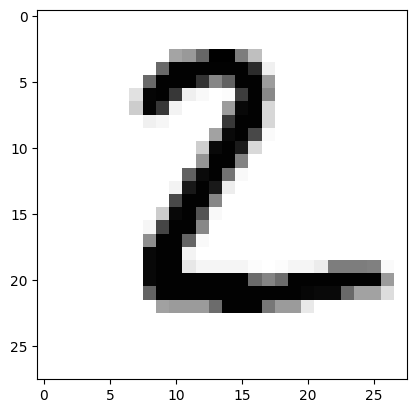

[1.1320918e-16 9.9987638e-01 1.5644693e-07 1.8893429e-07 8.2219458e-06
 1.8310375e-09 3.7543432e-06 1.1011759e-04 1.1422528e-06 3.3887445e-11] => 1


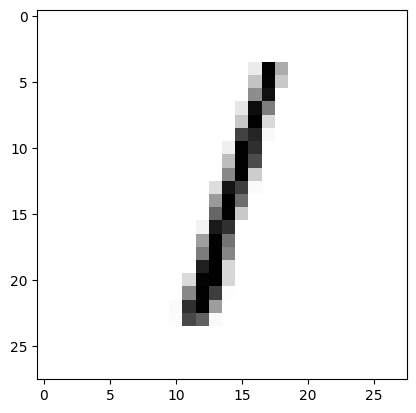

[9.9998266e-01 5.6258909e-10 6.3385542e-08 3.8836479e-08 6.6569311e-07
 5.0923001e-07 8.6062340e-07 1.5095606e-05 3.9973404e-08 2.8449163e-08] => 0


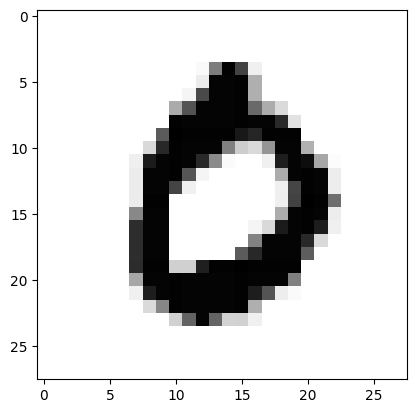

[2.01838357e-05 2.96260056e-04 1.80142408e-04 7.69387884e-03
 8.30803871e-01 2.36046202e-02 3.50527628e-03 8.80816299e-03
 2.20855861e-03 1.22878976e-01] => 4


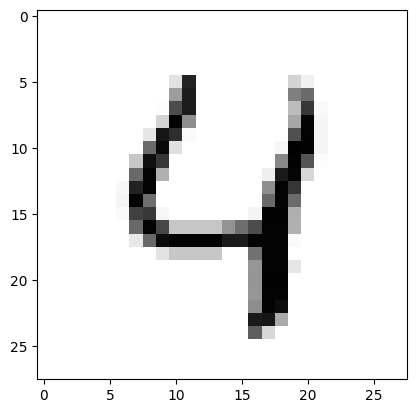

[9.7103550e-16 9.9998856e-01 7.0760362e-09 7.0931470e-08 6.2061622e-07
 8.5634694e-10 1.0081516e-06 7.6762599e-06 1.9974825e-06 3.4213559e-09] => 1


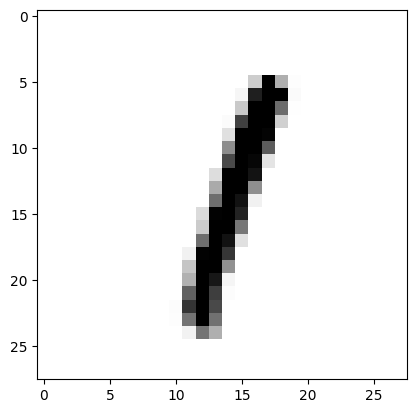

[1.8006585e-05 2.4751644e-03 2.6536355e-07 1.5399212e-04 2.6804826e-01
 6.3669957e-02 5.4867854e-03 1.3663317e-03 3.8082808e-01 2.7795309e-01] => 8


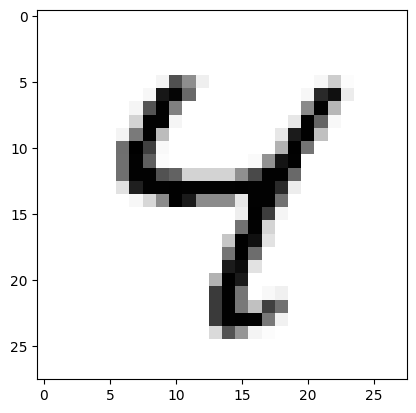

[2.8682023e-06 9.6732583e-05 4.6815559e-05 9.3426639e-03 1.3771747e-01
 5.3555528e-03 6.6400899e-05 1.8649697e-02 4.6802391e-03 8.2404155e-01] => 9


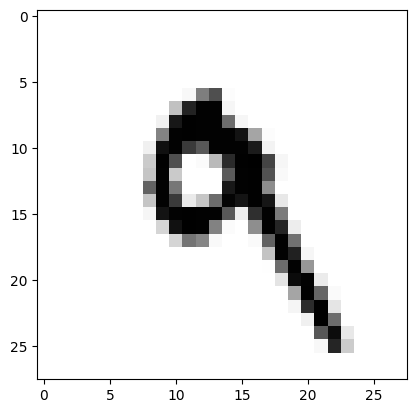

[3.1401636e-05 4.3766299e-06 2.9753655e-10 3.7879136e-08 8.1032056e-01
 5.6198193e-03 1.8396838e-01 9.0033109e-06 1.6980803e-05 2.9489207e-05] => 4


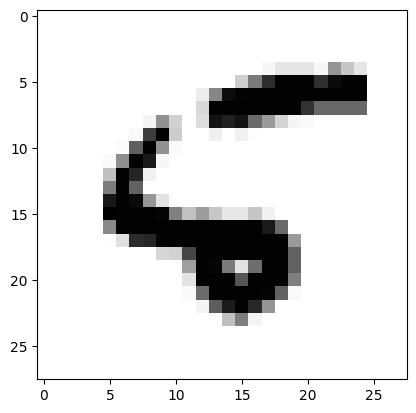

[7.95421541e-12 1.40110554e-08 8.90697863e-11 1.22759520e-05
 7.75868222e-02 1.94800050e-05 1.30509745e-08 1.26938929e-03
 1.74104707e-06 9.21110213e-01] => 9


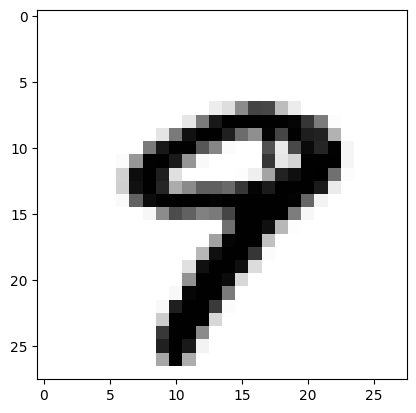

In [12]:
probs = model.predict(X_test)[:10]
preds = np.argmax(probs, axis=1)
for i in range(len(preds)):
    print(f'{probs[i]} => {preds[i]}')
    plt.imshow(X_test[i], cmap='Greys')
    plt.show();

In [13]:
input_shape = X_train.shape[1:]

model_mlp = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# sparse_categorical_crossentropy better to use this sparse one-hot encoded version of categorical crossentropy when possible
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "MnistNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28)             │         2,828 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,618 (318.82 KB)

 Trainable params: 81,618 (318.82 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history_mlp = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_data=[X_test, y_test], verbose=False)

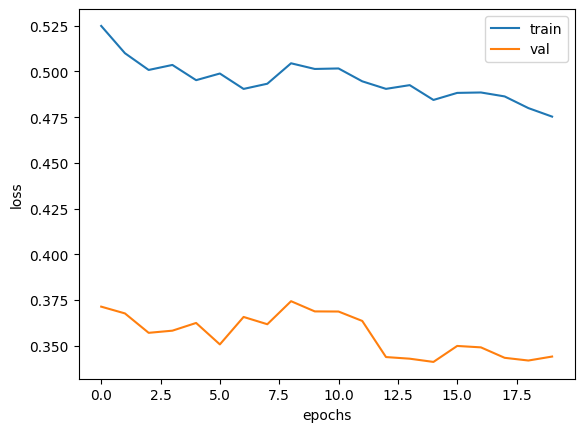

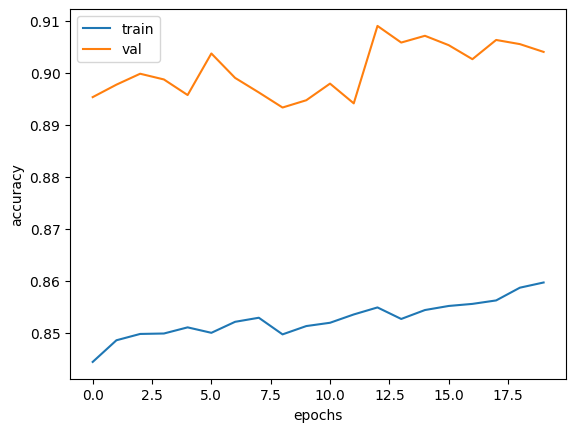

In [15]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.9040 - loss: 0.3441


[0.344088077545166, 0.9039999842643738]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step
[0.00000000e+00 2.56491077e-08 1.29346963e-05 3.24667562e-05
 1.14123914e-05 1.11577975e-07 3.22614678e-11 9.99941707e-01
 0.00000000e+00 1.28383897e-06] => 7


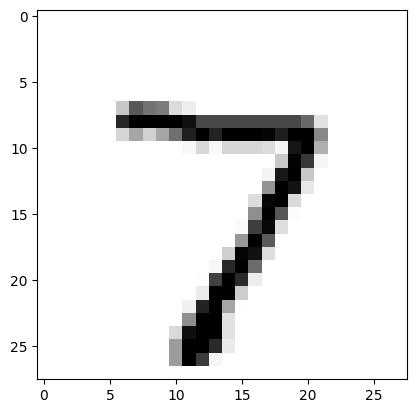

[1.6315157e-02 2.2904058e-03 8.9676607e-01 3.3731431e-02 1.3113247e-02
 4.8129186e-03 2.6365338e-02 1.8536061e-04 5.7450798e-03 6.7509356e-04] => 2


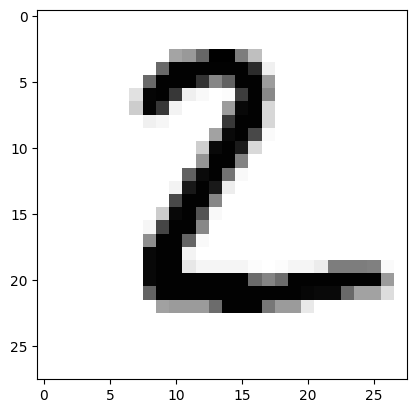

[0.0000000e+00 9.9833602e-01 1.6747751e-06 4.5749166e-06 2.7100585e-05
 1.0903338e-09 1.5686538e-04 6.4691709e-04 3.4900755e-04 4.7791193e-04] => 1


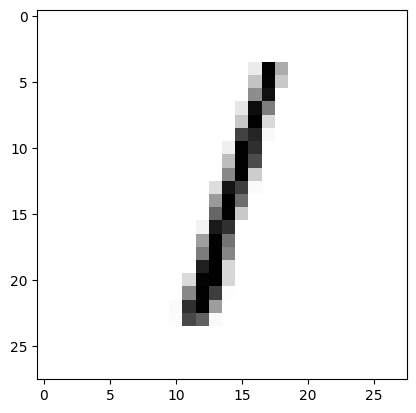

[9.9969757e-01 7.8449741e-10 8.1515807e-08 1.0314203e-06 2.9154319e-07
 2.6577062e-04 1.5938132e-05 1.8698362e-05 5.8393135e-07 1.7649023e-07] => 0


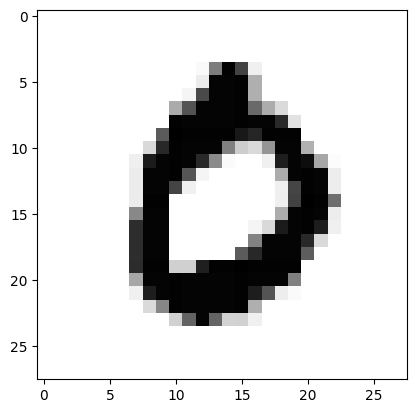

[4.8760697e-04 4.5911749e-04 1.1157773e-03 1.6149173e-02 6.5019536e-01
 6.6363607e-03 2.7681780e-03 1.1376761e-02 9.1293575e-03 3.0168223e-01] => 4


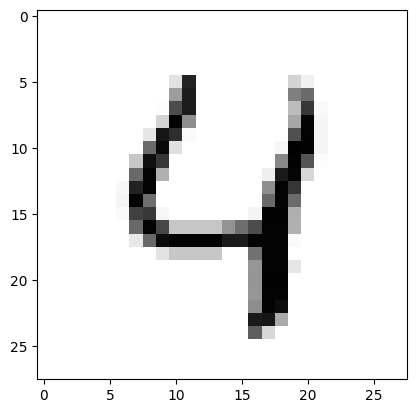

[0.0000000e+00 9.9980843e-01 2.8587905e-08 4.1392258e-07 4.5690713e-06
 1.5497491e-10 1.8467981e-05 2.5357296e-05 6.7293549e-05 7.5466181e-05] => 1


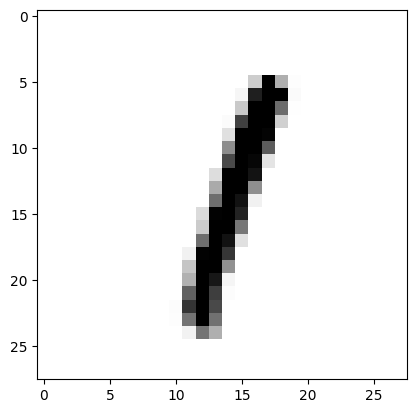

[8.0502890e-05 3.8210544e-04 1.8370426e-06 5.7886429e-03 6.3500732e-01
 4.4412725e-02 4.1565085e-03 2.6637751e-03 6.2525034e-02 2.4498156e-01] => 4


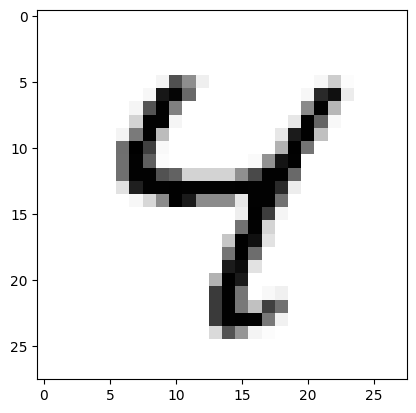

[4.3352273e-05 1.2596376e-04 6.9455084e-05 5.0632590e-03 7.0267200e-02
 2.5151728e-03 7.7730234e-05 2.7970413e-02 9.7476318e-03 8.8411993e-01] => 9


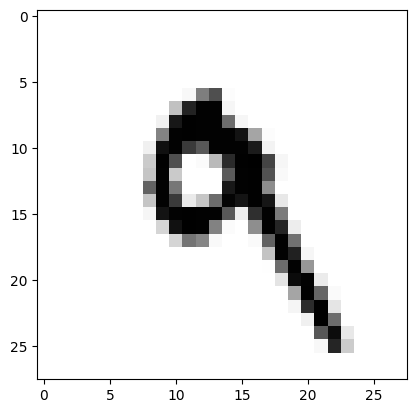

[5.5832140e-02 1.2252510e-06 1.7168540e-08 1.9506628e-05 3.2749873e-01
 3.7632931e-02 5.7734483e-01 3.4869969e-05 1.4270389e-03 2.0873910e-04] => 6


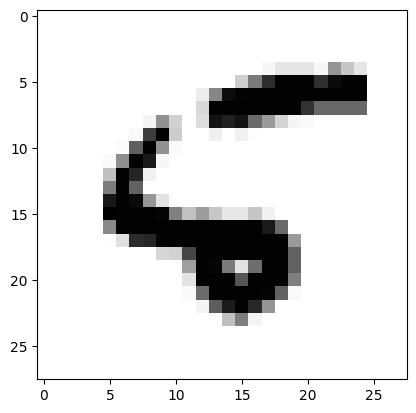

[1.8736237e-08 2.4155282e-08 2.0688375e-10 6.8367785e-06 1.8708155e-02
 1.1570456e-05 3.3493333e-08 9.0718316e-03 1.1237425e-05 9.7219032e-01] => 9


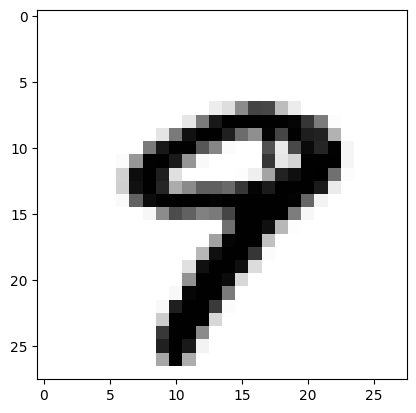

In [17]:
probs = model.predict(X_test)[:10]
preds = np.argmax(probs, axis=1)
for i in range(len(preds)):
    print(f'{probs[i]} => {preds[i]}')
    plt.imshow(X_test[i], cmap='Greys')
    plt.show();